# Análise Exploratória dos Dados

## Setup

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from shutil import copy2
from IPython.core.pylabtools import figsize
from yellowbrick.regressor import CooksDistance

figsize(10, 6)

In [27]:
# Read file
path = "./Normalized/"
name = "coliformes"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')
df.head()

,ENTIDADE,DATA,coliformes
0,P1,2013-01-07,241960.0
1,P2,2013-01-07,29090.0
2,P3,2013-01-07,23590.0
3,P4,2013-01-07,198630.0
4,P5,2013-01-07,100.0


In [28]:
# Transformations
df[name] = df[name].map(lambda x: str(x).replace("*", ""))
df[name] = df[name].astype("float64")
df["DATA"] =  pd.to_datetime(df["DATA"], format="%Y-%m-%d")
df["YEAR"] = df["DATA"].map(lambda x: x.year)
df.dtypes

ENTIDADE              object
DATA          datetime64[ns]
coliformes           float64
YEAR                   int64
dtype: object

In [29]:
df.describe()

,coliformes,YEAR
count,7.130000e+02,720.00000
mean,2.149664e+06,2016.00000
std,1.374496e+07,1.78075
min,1.080000e+00,2013.00000
25%,1.400000e+03,2014.75000
50%,4.100000e+04,2016.00000
75%,3.500000e+05,2017.25000
max,2.419000e+08,2019.00000


## Verificando a Distribuição dos Valores

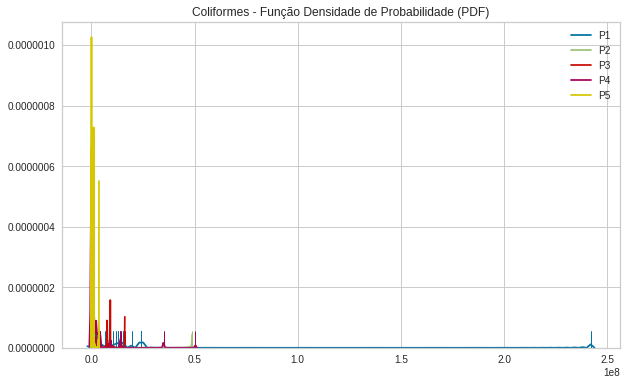

In [30]:
entity_names = df.ENTIDADE.unique().tolist()
entities = [df.loc[df['ENTIDADE'] == entity_name] for entity_name in entity_names]

for entity in entities:
    sns.distplot(entity[[name]].dropna(), hist=False, rug=True, label=str(entity['ENTIDADE'].unique()[0]))
plt.title(f"{name.capitalize()} - Função Densidade de Probabilidade (PDF)");

## Série Histórica

<Figure size 1080x576 with 0 Axes>

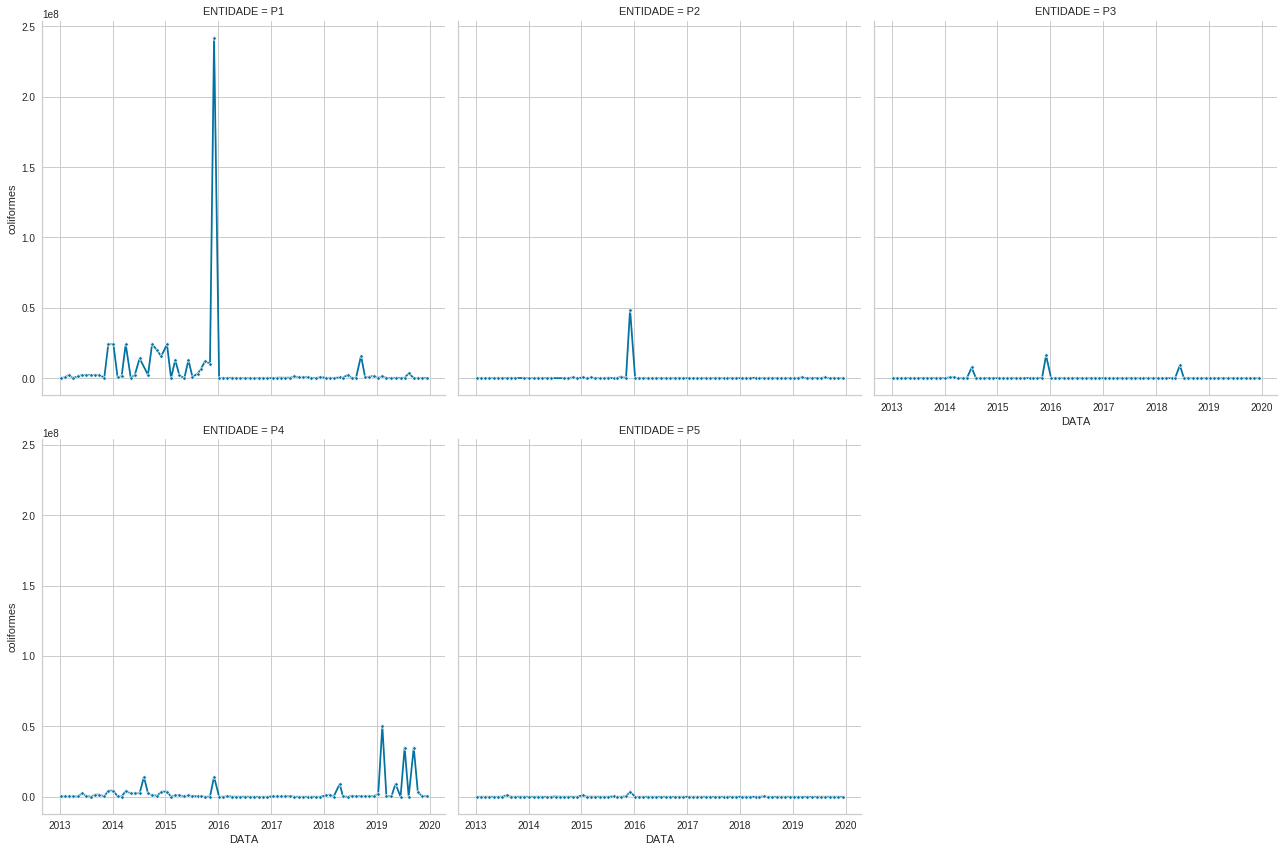

In [31]:
plt.figure(figsize=(15, 8))
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=6, dropna=True)
g = g.map(sns.lineplot, "DATA", name, marker=".", palette="Set2")
plt.show();
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)

## Localizando outliers

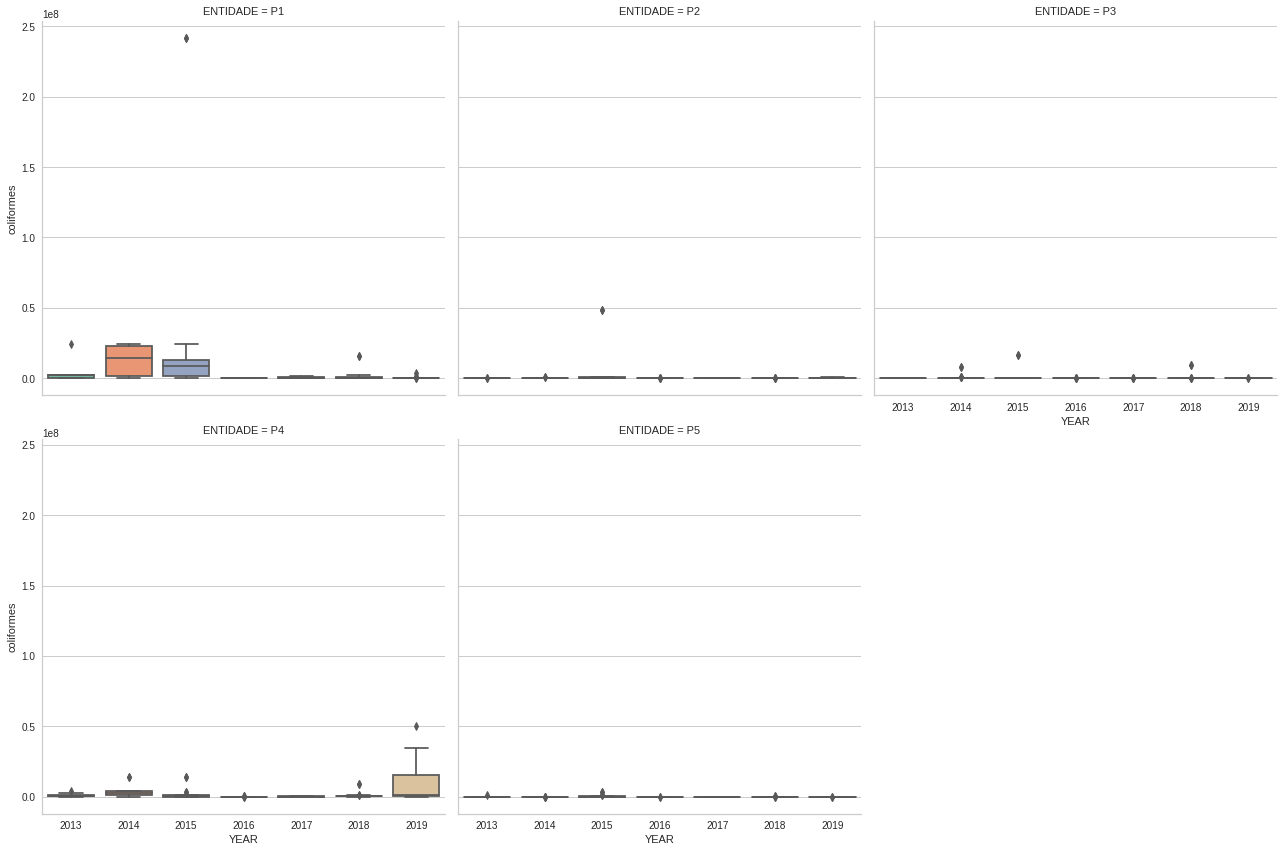

In [32]:
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=6, dropna=True);
g = g.map(sns.boxplot, "YEAR", name, palette="Set2")

In [26]:
# df.to_csv(f"./Normalized/{name}.csv", encoding='utf8', index=False)
copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")

'./EDA/EDA_alcalinidade.ipynb'